In [1]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
ACCESS_TOKEN = "1094926398-xjds9JDzgcoKpov7AqZQB1OSOa83P6Ot1ISf5PQ"
ACCESS_SECRET ="EdMgr9HC6IIXYgwUp2VDxfrEtgfdbiLe1ziA7HeChoIsG" 
CONSUMER_KEY ="UaPhFj3tRVHEzrKkjkIT32HFb" 
CONSUMER_SECRET ="UrUCOkdmPrdNhdG4inCBZvhfDUoHZOD7x0VL9HWzCBPAcpFIaM"     # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
   
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
 

    
    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [28]:
extractor = twitter_setup()

# We create a tweet list as follows:

tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=500)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("10 recent tweets:\n")
for tweet in tweets[:10]:
    
    print(tweet.text)
    print()

Number of tweets extracted: 200.

10 recent tweets:

Congratulations to Senator Cindy Hyde-Smith on your big WIN in the Great State of Mississippi. We are all very proud of you!

Brenda Snipes, in charge of voting in Broward County, Florida, was just spotted wearing a beautiful dress with 300… https://t.co/gPIS4u4r7Q

The Mueller Witch Hunt is a total disgrace. They are looking at supposedly stolen Crooked Hillary Clinton Emails (e… https://t.co/Hd4mV8lxv2

....for electric cars. General Motors made a big China bet years ago when they built plants there (and in Mexico) -… https://t.co/0U7lwZ3pfy

Very disappointed with General Motors and their CEO, Mary Barra, for closing plants in Ohio, Michigan and Maryland.… https://t.co/5JUbkq1Xkg

Polls are open in Mississippi. We need Cindy Hyde-Smith in Washington. GO OUT AND VOTE. Thanks!

....terrible Gang of Angry Democrats. Look at their past, and look where they come from. The now $30,000,000 Witch… https://t.co/g3rup9iqga

....The Fake New

In [29]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Congratulations to Senator Cindy Hyde-Smith on...
1,"Brenda Snipes, in charge of voting in Broward ..."
2,The Mueller Witch Hunt is a total disgrace. Th...
3,....for electric cars. General Motors made a b...
4,Very disappointed with General Motors and thei...
5,Polls are open in Mississippi. We need Cindy H...
6,....terrible Gang of Angry Democrats. Look at ...
7,....The Fake News Media builds Bob Mueller up ...
8,"The Phony Witch Hunt continues, but Mueller an..."
9,"RT @GOP: “Tomorrow, the voters of this state w..."


In [30]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [31]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1067624656943935493
2018-11-28 03:42:08
Twitter for iPhone
43094
10419
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [32]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [33]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Congratulations to Senator Cindy Hyde-Smith on...,124,1067624656943935493,2018-11-28 03:42:08,Twitter for iPhone,43094,10419
1,"Brenda Snipes, in charge of voting in Broward ...",139,1067623816921272325,2018-11-28 03:38:48,Twitter for iPhone,39829,9674
2,The Mueller Witch Hunt is a total disgrace. Th...,140,1067576713859817472,2018-11-28 00:31:37,Twitter for iPhone,69488,20472
3,....for electric cars. General Motors made a b...,140,1067494682249318402,2018-11-27 19:05:39,Twitter for iPhone,85291,20009
4,Very disappointed with General Motors and thei...,140,1067494680416407552,2018-11-27 19:05:39,Twitter for iPhone,96053,24753
5,Polls are open in Mississippi. We need Cindy H...,95,1067410952042283010,2018-11-27 13:32:57,Twitter for iPhone,61826,16537
6,....terrible Gang of Angry Democrats. Look at ...,139,1067404517841518593,2018-11-27 13:07:23,Twitter for iPhone,88930,24921
7,....The Fake News Media builds Bob Mueller up ...,140,1067398375337791488,2018-11-27 12:42:58,Twitter for iPhone,81293,22235
8,"The Phony Witch Hunt continues, but Mueller an...",140,1067395266511347713,2018-11-27 12:30:37,Twitter for iPhone,80633,22939
9,"RT @GOP: “Tomorrow, the voters of this state w...",139,1067280598128095232,2018-11-27 04:54:58,Twitter for iPhone,0,8727


In [34]:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 128.79


In [35]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Tremendous success tonight. Thank you to all!
Number of likes: 253245
45 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: The Fake News is showing old footage of people climbing over our Ocean Area Fence. This is what it really looks like -…
Number of retweets: 51812
140 characters.



In [36]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

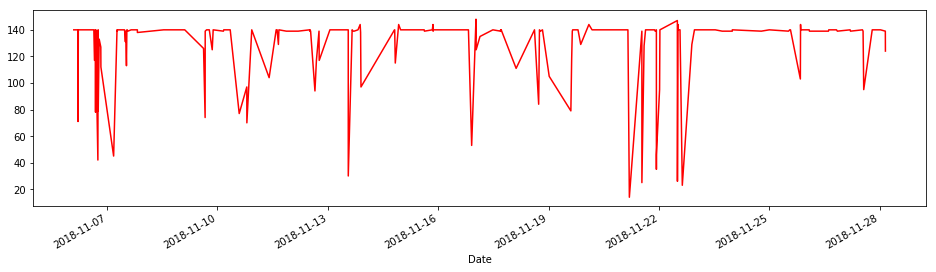

In [37]:
tlen.plot(figsize=(16,4), color='r');

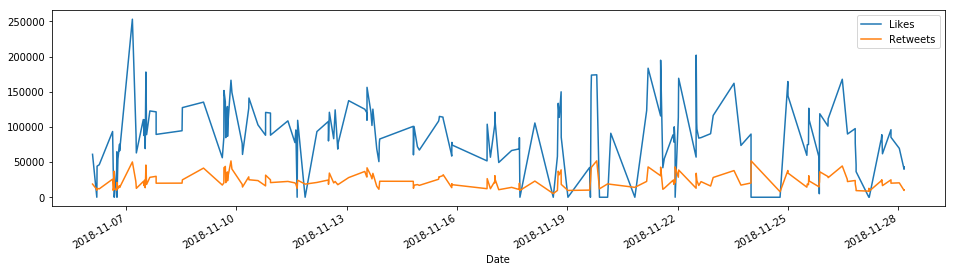

In [38]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [39]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio


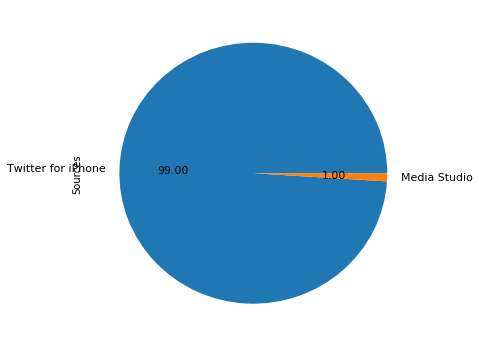

In [40]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [41]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [42]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Congratulations to Senator Cindy Hyde-Smith on...,124,1067624656943935493,2018-11-28 03:42:08,Twitter for iPhone,43094,10419,1
1,"Brenda Snipes, in charge of voting in Broward ...",139,1067623816921272325,2018-11-28 03:38:48,Twitter for iPhone,39829,9674,1
2,The Mueller Witch Hunt is a total disgrace. Th...,140,1067576713859817472,2018-11-28 00:31:37,Twitter for iPhone,69488,20472,0
3,....for electric cars. General Motors made a b...,140,1067494682249318402,2018-11-27 19:05:39,Twitter for iPhone,85291,20009,1
4,Very disappointed with General Motors and thei...,140,1067494680416407552,2018-11-27 19:05:39,Twitter for iPhone,96053,24753,-1
5,Polls are open in Mississippi. We need Cindy H...,95,1067410952042283010,2018-11-27 13:32:57,Twitter for iPhone,61826,16537,1
6,....terrible Gang of Angry Democrats. Look at ...,139,1067404517841518593,2018-11-27 13:07:23,Twitter for iPhone,88930,24921,-1
7,....The Fake News Media builds Bob Mueller up ...,140,1067398375337791488,2018-11-27 12:42:58,Twitter for iPhone,81293,22235,-1
8,"The Phony Witch Hunt continues, but Mueller an...",140,1067395266511347713,2018-11-27 12:30:37,Twitter for iPhone,80633,22939,-1
9,"RT @GOP: “Tomorrow, the voters of this state w...",139,1067280598128095232,2018-11-27 04:54:58,Twitter for iPhone,0,8727,1


In [43]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [44]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 57.5%
Percentage of neutral tweets: 25.0%
Percentage de negative tweets: 17.5%
